<a href="https://colab.research.google.com/github/Mohammad-Rayyan97/Deep-Learning-Projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting zip files
from zipfile import ZipFile

data  = '/content/face-mask-dataset.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()


In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

In [6]:
with_mask_images = os.listdir('/content/data/with_mask')
with_mask_images[0:5]

['with_mask_921.jpg',
 'with_mask_324.jpg',
 'with_mask_1211.jpg',
 'with_mask_572.jpg',
 'with_mask_3226.jpg']

In [7]:
without_mask_images = os.listdir('/content/data/without_mask')
without_mask_images[0:5]

['without_mask_399.jpg',
 'without_mask_1690.jpg',
 'without_mask_418.jpg',
 'without_mask_1677.jpg',
 'without_mask_443.jpg']

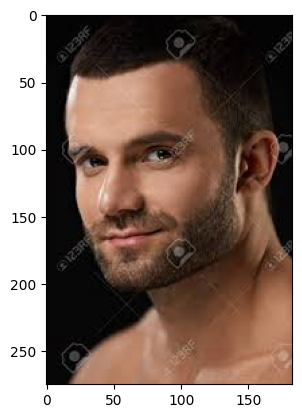

In [8]:
img = mpimg.imread('/content/data/without_mask/without_mask_2765.jpg')
plt.imshow(img)
plt.show()

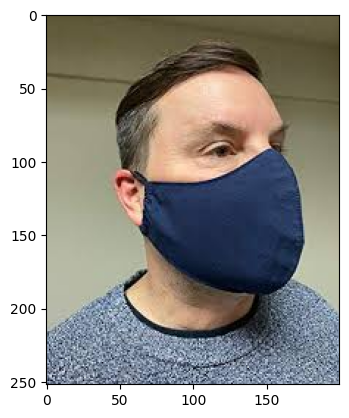

In [9]:
img = mpimg.imread('/content/data/with_mask/with_mask_2765.jpg')
plt.imshow(img)
plt.show()

In [10]:
# checking the total pics
print(len(with_mask_images))
print(len(without_mask_images))

3725
3828


In [11]:
# resizing the images in same size
mask_image_path = '/content/data/with_mask/'
data=[]
for img_name in with_mask_images:
  image = Image.open(mask_image_path + img_name)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.asarray(image)
  data.append(image)

without_image_path = '/content/data/without_mask/'

for img_name in without_mask_images:
  image = Image.open(without_image_path + img_name)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.asarray(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
len(data)


7553

In [13]:
# creating labels for both types of images

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [14]:
labels = with_mask_labels + without_mask_labels

In [15]:
len(labels)

7553

1


array([[[ 70,  65,  72],
        [ 69,  64,  71],
        [ 67,  62,  69],
        ...,
        [ 69,  67,  78],
        [ 68,  66,  78],
        [ 67,  65,  78]],

       [[ 68,  63,  70],
        [ 67,  62,  69],
        [ 66,  61,  68],
        ...,
        [ 66,  64,  75],
        [ 66,  65,  77],
        [ 66,  64,  77]],

       [[ 68,  63,  70],
        [ 68,  63,  70],
        [ 68,  63,  70],
        ...,
        [ 67,  64,  75],
        [ 67,  64,  76],
        [ 66,  64,  76]],

       ...,

       [[192, 177, 182],
        [200, 185, 190],
        [215, 200, 205],
        ...,
        [255, 246, 245],
        [254, 246, 244],
        [253, 244, 243]],

       [[228, 213, 218],
        [224, 209, 214],
        [221, 206, 211],
        ...,
        [255, 246, 244],
        [253, 245, 244],
        [253, 245, 244]],

       [[237, 222, 227],
        [236, 221, 225],
        [233, 218, 223],
        ...,
        [255, 246, 244],
        [255, 246, 246],
        [255, 246, 247]]], dtype=uint8)
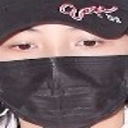

In [16]:
print(labels[0])
data[0]


In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(128, 128, 3)

In [19]:
X= np.array(data)
y= np.array(labels)

In [20]:
print(X.shape,y.shape)

(7553, 128, 128, 3) (7553,)


In [21]:
X = X/255
X[0]

array([[[0.2745098 , 0.25490196, 0.28235294],
        [0.27058824, 0.25098039, 0.27843137],
        [0.2627451 , 0.24313725, 0.27058824],
        ...,
        [0.27058824, 0.2627451 , 0.30588235],
        [0.26666667, 0.25882353, 0.30588235],
        [0.2627451 , 0.25490196, 0.30588235]],

       [[0.26666667, 0.24705882, 0.2745098 ],
        [0.2627451 , 0.24313725, 0.27058824],
        [0.25882353, 0.23921569, 0.26666667],
        ...,
        [0.25882353, 0.25098039, 0.29411765],
        [0.25882353, 0.25490196, 0.30196078],
        [0.25882353, 0.25098039, 0.30196078]],

       [[0.26666667, 0.24705882, 0.2745098 ],
        [0.26666667, 0.24705882, 0.2745098 ],
        [0.26666667, 0.24705882, 0.2745098 ],
        ...,
        [0.2627451 , 0.25098039, 0.29411765],
        [0.2627451 , 0.25098039, 0.29803922],
        [0.25882353, 0.25098039, 0.29803922]],

       ...,

       [[0.75294118, 0.69411765, 0.71372549],
        [0.78431373, 0.7254902 , 0.74509804],
        [0.84313725, 0

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


In [34]:
from tensorflow.keras.layers import Dense , Conv2D, Flatten,MaxPool2D,BatchNormalization,Dropout
from tensorflow.keras import Sequential, layers
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

In [24]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=30,  # Increased rotation range
    zoom_range=0.2,     # Increased zoom range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    shear_range=0.2,    # Increased shear range
    horizontal_flip=True,
    fill_mode="nearest"
)




# CNN

model= Sequential([
    Conv2D(32,activation='relu',kernel_size=(3,3), input_shape=(128,128,3)),
    MaxPool2D(pool_size = (3,3)),

    Conv2D(64,activation='relu',kernel_size=(3,3)),
    MaxPool2D(pool_size = (3,3)),




    Flatten(),

    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),

    layers.BatchNormalization(),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.5),

    tf.keras.layers.Dense(2, activation='sigmoid')


])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7235 - loss: 0.6329 - val_accuracy: 0.7339 - val_loss: 0.5089
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8555 - loss: 0.3470 - val_accuracy: 0.8909 - val_loss: 0.3067
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8933 - loss: 0.2612 - val_accuracy: 0.8694 - val_loss: 0.2918
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9045 - loss: 0.2324 - val_accuracy: 0.9107 - val_loss: 0.2574
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9264 - loss: 0.1940 - val_accuracy: 0.9289 - val_loss: 0.2026


In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9307 - loss: 0.2096
Test Accuracy = 0.9265387058258057


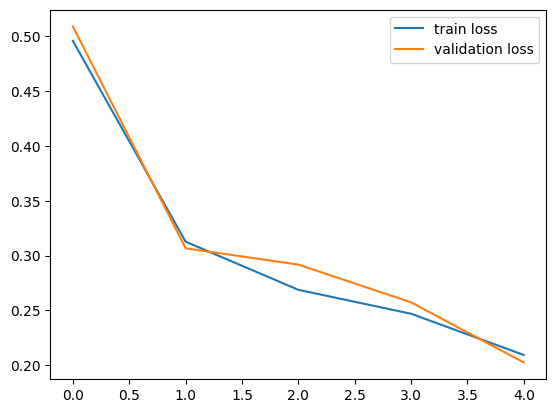

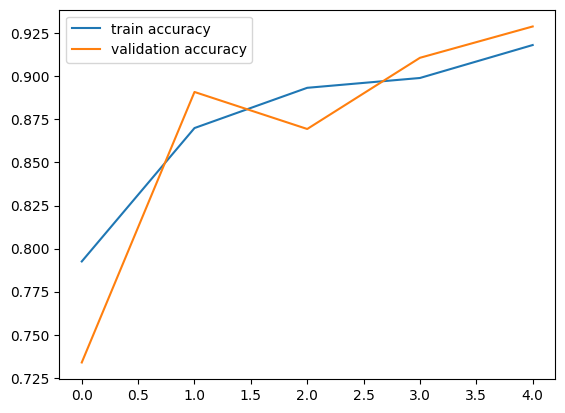

In [28]:
# plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Enter the path of new photo/content/without_mask.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


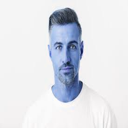

The person in picture is not having mask


In [35]:
# predicting with new data

new_image_path = input('Enter the path of new photo')
image = Image.open(new_image_path)
image = image.resize((128,128))
image = image.convert('RGB')
image = np.asarray(image)
image_scaled = image/255
image_reshaped = np.reshape(image_scaled,(1,128,128,3))

image_pred = model.predict(image_reshaped)
image_pred_label = np.argmax(image_pred)

cv2_imshow(image)
if image_pred_label==1:
  print("The person in picture is having mask")
else:
  print("The person in picture is not having mask")



Enter the path of new photo/content/with_mask.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


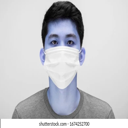

The person in picture is having mask


In [36]:
# predicting with new data

new_image_path = input('Enter the path of new photo')
image = Image.open(new_image_path)
image = image.resize((128,128))
image = image.convert('RGB')
image = np.asarray(image)
image_scaled = image/255
image_reshaped = np.reshape(image_scaled,(1,128,128,3))

image_pred = model.predict(image_reshaped)
image_pred_label = np.argmax(image_pred)

cv2_imshow(image)
if image_pred_label==1:
  print("The person in picture is having mask")
else:
  print("The person in picture is not having mask")

